In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('Test.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [5]:
df.shape

(5681, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
#checkinh missing vaues
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
#handlinh missing values
df['Item_Weight'].mean()

12.695633368756642

In [9]:
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'] = df['Item_Weight'].fillna(mean_weight)

In [29]:
mode_outlet_size = df.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=lambda x: x.mode()[0])
print(mode_outlet_size)

Outlet_Type                           Grocery Store Supermarket Type1  \
Outlet_Size  [[Small], [Small], [Medium], [Medium]]             Small   

Outlet_Type Supermarket Type2 Supermarket Type3  
Outlet_Size            Medium            Medium  


In [30]:
missing_values=df['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Outlet_Size, Length: 5681, dtype: bool


In [31]:
df.loc[missing_values,'Outlet_Size']=df.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet_size)

In [32]:
#checkinh missing vaues
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [33]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.695633,0.354339,0.065684,7.233410,141.023273,4.722760,1997.828903
std,445.525926,4.245189,0.478355,0.051252,4.219057,61.809091,2.837201,8.372256
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000
25%,382.000000,9.195000,0.000000,0.027047,4.000000,94.412000,2.000000,1987.000000
50%,771.000000,12.695633,0.000000,0.054154,6.000000,141.415400,5.000000,1999.000000
75%,1160.000000,15.850000,1.000000,0.093463,10.000000,186.026600,7.000000,2004.000000
max,1542.000000,21.350000,1.000000,0.323637,15.000000,266.588400,9.000000,2009.000000


C:\Users\ACER\AppData\Local\Temp\ipykernel_8136\3029587641.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

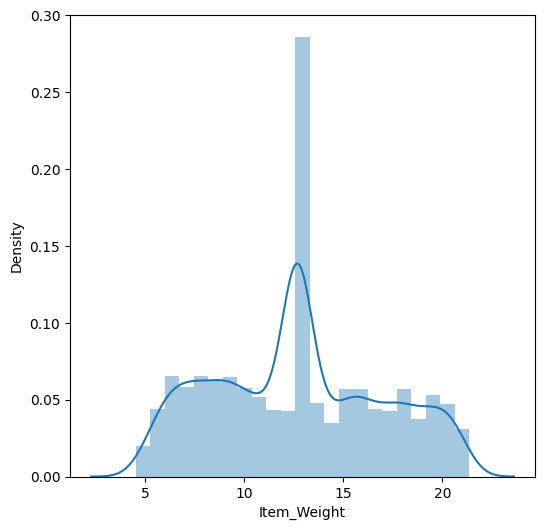

In [34]:
#item weight distribution in graphical method
# sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
# plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8136\876177660.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

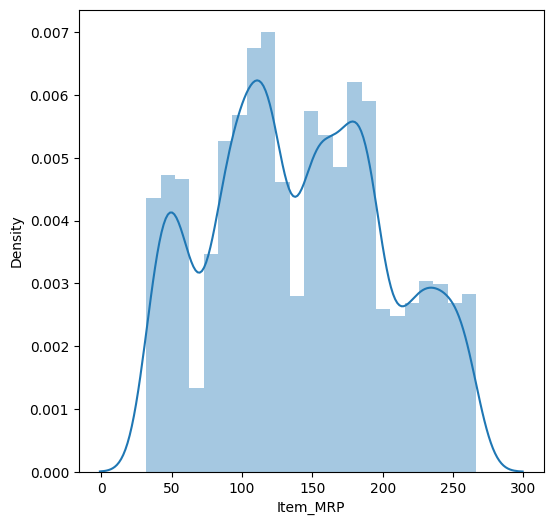

In [35]:
#item MRP distribution in graphical method
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_8136\949478674.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

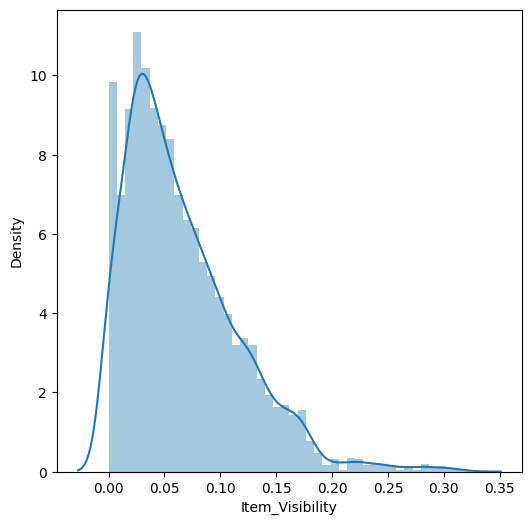

In [36]:
#Item_Visibility graphical representation
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_8136\2505092211.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Outlet_Establishment_Year'])


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

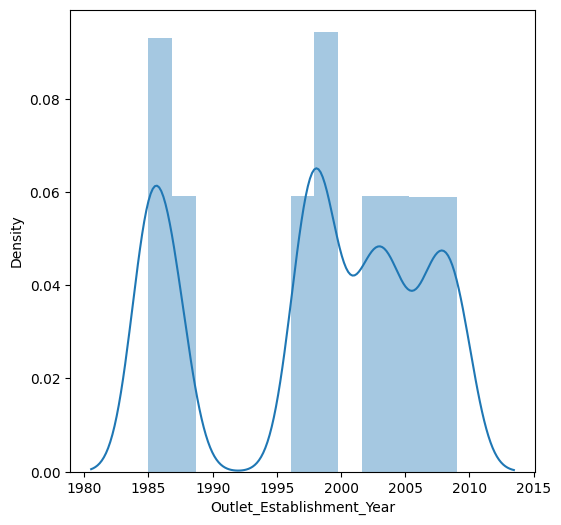

In [37]:
#Outlet_Establishment_Year graphical representation
plt.figure(figsize=(6,6))
sns.distplot(df['Outlet_Establishment_Year'])

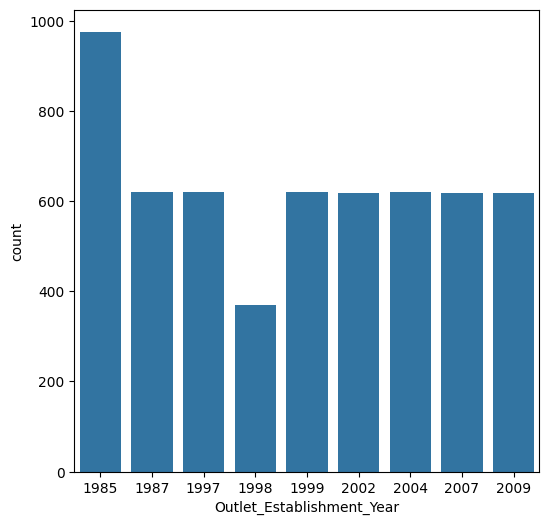

In [38]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

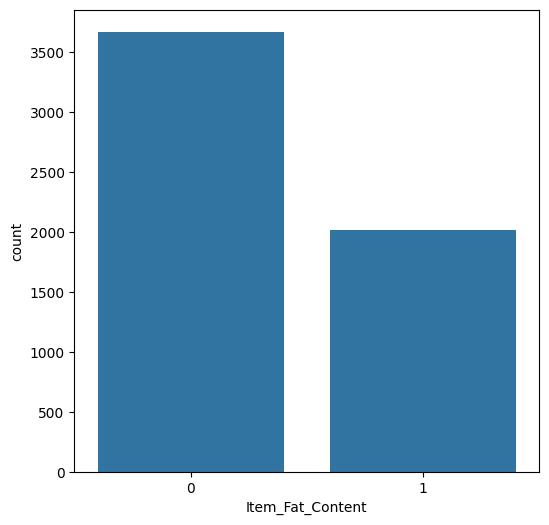

In [39]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

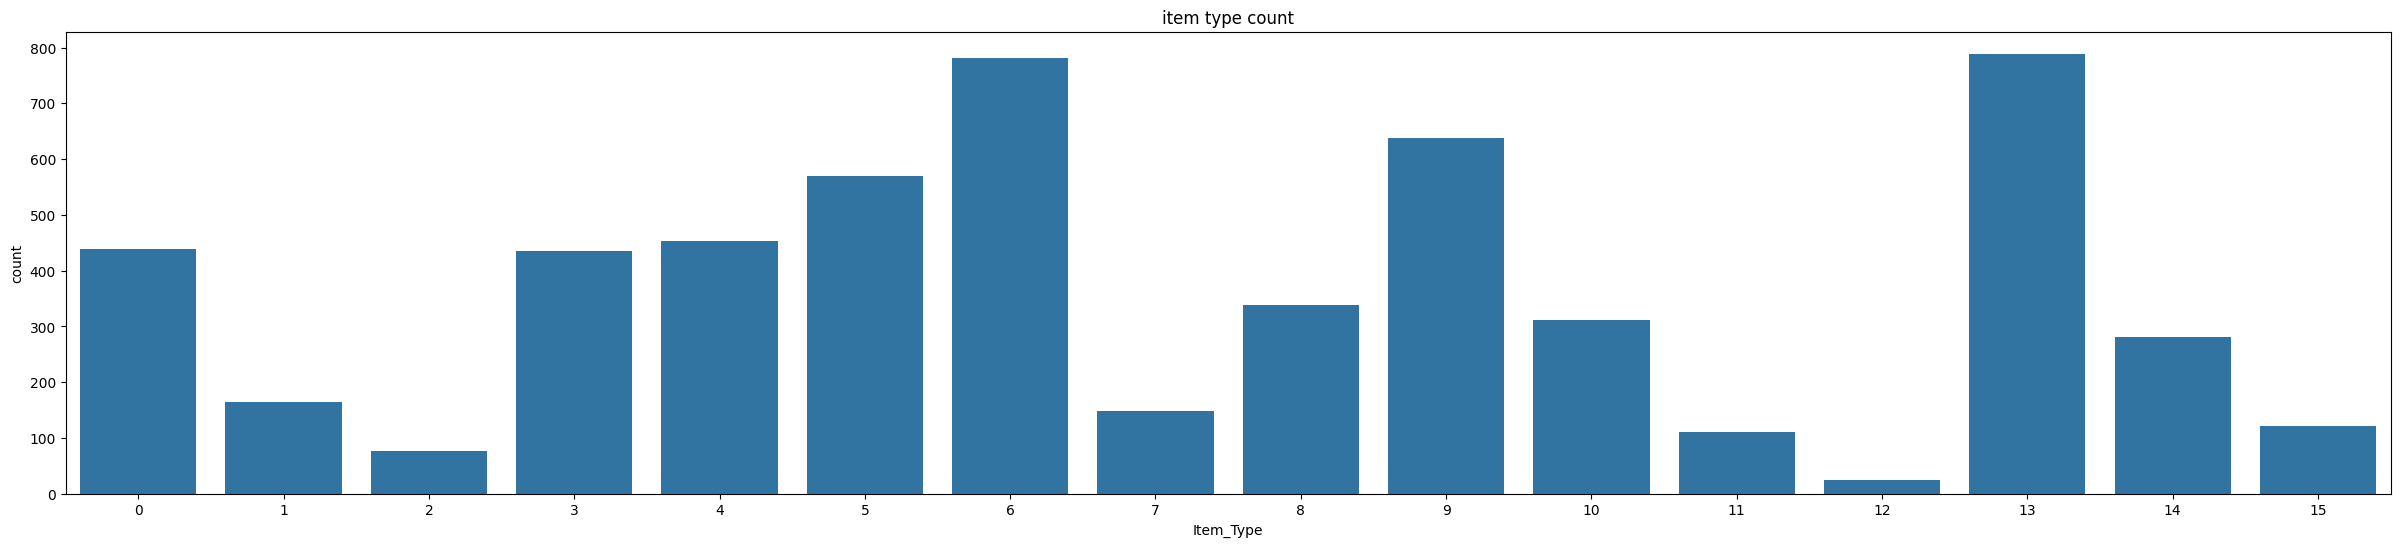

In [40]:
plt.figure(figsize=(30, 6))
sns.countplot(x='Item_Type', data=df)
plt.title('item type count')
plt.show()

In [41]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    3668
1    2013
Name: count, dtype: int64

In [42]:
#we have to replace LF and low fat to Low fat and reg to Resgular
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [43]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    3668
1    2013
Name: count, dtype: int64

In [52]:
df['Outlet_Size']=df['Outlet_Size'].apply(lambda x:str(x) if not isinstance(x,str) else x)

In [53]:
#we have to change categorical data using label encoder
encoder=LabelEncoder()
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])

In [54]:
 df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,2,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,0,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,0,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,0,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,2,2,3


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int64  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int64  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int64  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int64  
 10  Outlet_Type                5681 non-null   int64  
dtypes: float64(3), int32(1), int64(7)
memory usage: 466.1 KB
